In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datasetPath = "path to dataset"
df = pd.read_csv(datasetPath)
print(f"Total samples: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

Total samples: 16209
Columns: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'image_path']


In [3]:
df.drop(['date','id'],axis=1,inplace=True)
print("\nMissing values:")
print(df.isnull().sum())
print(df.shape)


Missing values:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
image_path       0
dtype: int64
(16209, 20)


In [4]:
print(f"\nPrice statistics:")
print(f"Mean: ${df['price'].mean():,.2f}")
print(f"Median: ${df['price'].median():,.2f}")
print(f"Min: ${df['price'].min():,.2f}")
print(f"Max: ${df['price'].max():,.2f}")


Price statistics:
Mean: $537,470.28
Median: $450,000.00
Min: $75,000.00
Max: $7,700,000.00


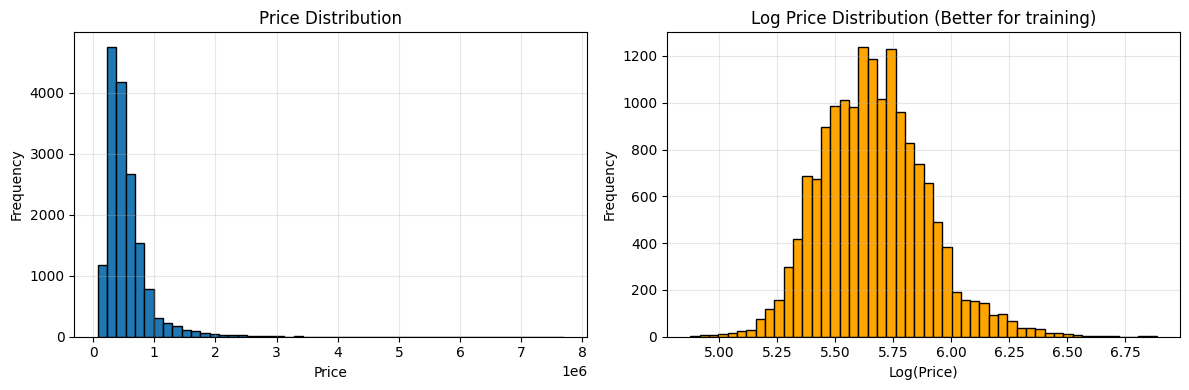

In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(np.log10(df['price']), bins=50, edgecolor='black', color='orange')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Log Price Distribution (Better for training)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
df['price'] = np.log10(df['price'])

In [7]:
numeric_cols = []
for i in df.columns.tolist():
    if i not in ['lat','long','image_path']:
        numeric_cols.append(i)

numeric_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15']

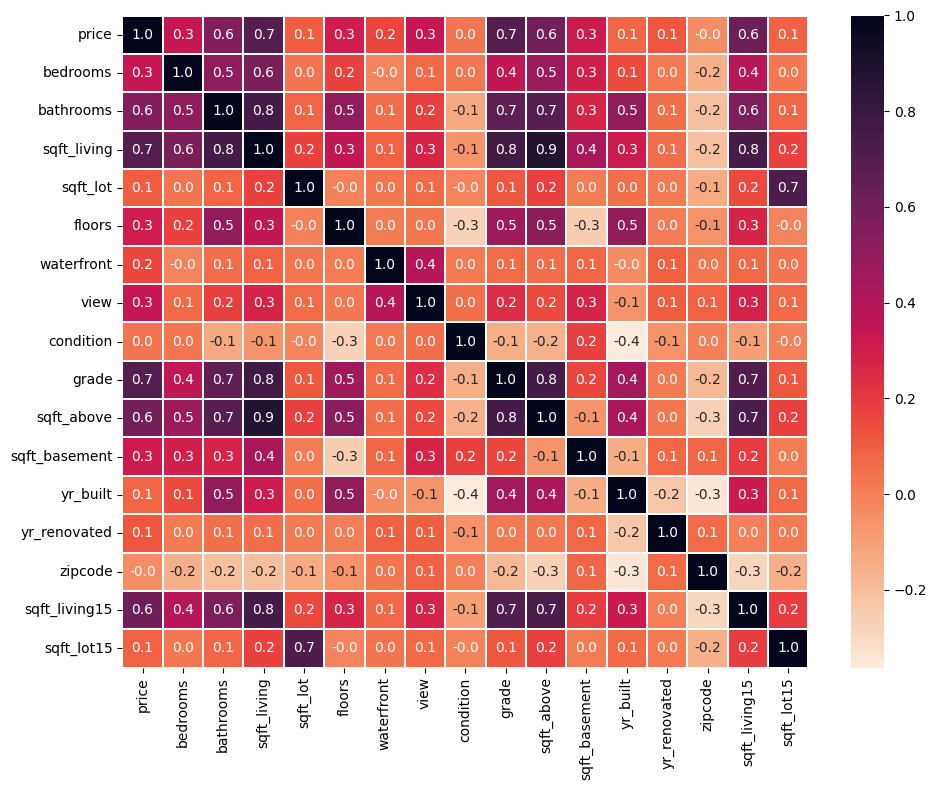

In [8]:
correlationMatrix = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlationMatrix,annot=True,linewidths=1.2,fmt='.1f',cmap='rocket_r')
plt.tight_layout()
plt.show()

In [9]:
X = df.drop(['price'], axis=1)
y = df['price']

In [10]:
X_train, X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.2,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [11]:
X_train_images = X_train['image_path'].copy()
X_train.drop('image_path',axis=1,inplace=True)

X_val_images = X_val['image_path'].copy()
X_val.drop('image_path',axis=1,inplace=True)

X_test_images = X_test['image_path'].copy()
X_test.drop('image_path',axis=1,inplace=True)

In [12]:
y.describe()

count    16209.000000
mean         5.665458
std          0.227519
min          4.875061
25%          5.505150
50%          5.653213
75%          5.806180
max          6.886491
Name: price, dtype: float64

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [14]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled,columns=X_val.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [15]:
X_train_scaled_df['image_path'] = X_train_images.values
X_val_scaled_df['image_path'] = X_val_images.values
X_test_scaled_df['image_path'] = X_test_images.values

In [16]:
train_df = X_train_scaled_df.copy()
test_df = X_test_scaled_df.copy()
val_df = X_val_scaled_df.copy()

In [17]:
train_df['price'] = y_train.values
test_df['price'] = y_test.values
val_df['price'] = y_val.values

In [ ]:
train_df.to_csv('path to save the dataset',index=False)
test_df.to_csv('path to save the dataset',index=False)
val_df.to_csv('path to save the dataset',index=False)

# Pre_Processing Test Files

In [ ]:
df_train = pd.read_csv('path to test dataset')

In [21]:
df_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,image_path
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,...,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,Map_Images_Test\property_0_47.4388_-122.162.png
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,...,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,Map_Images_Test\property_1_47.6784_-122.285.png
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,...,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,Map_Images_Test\property_2_47.5646_-122.129.png
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,...,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,Map_Images_Test\property_3_47.6995_-122.228.png
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,...,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,Map_Images_Test\property_4_47.6647_-122.083.png


In [22]:
df_train.drop(['id','date'],axis=1,inplace=True)

In [23]:
df_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,image_path
0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,Map_Images_Test\property_0_47.4388_-122.162.png
1,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,Map_Images_Test\property_1_47.6784_-122.285.png
2,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,Map_Images_Test\property_2_47.5646_-122.129.png
3,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,Map_Images_Test\property_3_47.6995_-122.228.png
4,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,Map_Images_Test\property_4_47.6647_-122.083.png


In [27]:
X_images = df_train.drop('image_path',axis=1)
y_images = df_train['image_path']

In [28]:
X_images_scaled = scaler.transform(X_images)

In [30]:
df_train_processed = pd.DataFrame(X_images_scaled,columns=X_images.columns)
df_train_processed['image_path'] = y_images.values

In [ ]:
df_train_processed.to_csv('path to save dataset',index=False)